## 4.2 BOW 기반의 카운트 벡터 생성

In [3]:
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\namyo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
fileid = movie_reviews.fileids()[0]
print('#id of the first review :', fileid)

# 첫 번째 문서의 내용을 200자까지만 출력
print('#first review content:\n', movie_reviews.raw(fileid)[:200])

# 첫 번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('#sentence tokenization result:', movie_reviews.sents(fileid)[:2])

# 첫 번째 문서를 word tokenize한 결과 중 앞 20개 단어
print('#word tokenization result:', movie_reviews.words(fileid)[:20])

#id of the first review : neg/cv000_29416.txt
#first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w
#sentence tokenization result: [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
#word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [4]:
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
print(documents[0][:50]) #첫째 문서의 앞 50개 단어를 출력

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [5]:
word_count = {}
for text in documents:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

count of ',': 77717, count of 'the': 76529, count of '.': 65876, count of 'a': 38106, count of 'and': 35576, count of 'of': 34123, count of 'to': 31937, count of ''': 30585, count of 'is': 25195, count of 'in': 21822, 

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들

tokenizer = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

#words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()] 

# stopwords의 적용과 토큰화를 동시에 수행.
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

In [7]:
word_features = sorted_features[:1000] #빈도가 높은 상위 1000개의 단어만 추출하여 features를 구성

In [8]:
def document_features(document, word_features):
    word_count = {}
    for word in document: #document에 있는 단어들에 대해 빈도수를 먼저 계산
        word_count[word] = word_count.get(word, 0) + 1
        
    features = []
    for word in word_features: #word_features의 단어에 대해 계산된 빈도수를 feature에 추가
        features.append(word_count.get(word, 0)) #빈도가 없는 단어는 0을 입력
    return features

word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['two', 'two', 'couples']
print(document_features(doc_ex, word_features_ex))

[0, 2, 0, 1, 0]


In [9]:
feature_sets = [document_features(d, word_features) for d in tokens]

# 첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력
for i in range(20):
    print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

In [10]:
print(feature_sets[0][-20:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4.3 사이킷런으로 카운트 벡터 생성

In [11]:
# data 준비, movie_reviews.raw()를 사용하여 raw text를 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()

# 앞에서 생성한 word_features로 특성 집합을 지정하는 경우
cv = CountVectorizer(vocabulary=word_features)

# 특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
#cv = CountVectorizer(max_features=1000)

print(cv)  # 객체의 인수를 확인

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [13]:
reviews_cv = cv.fit_transform(reviews)
print(cv.get_feature_names_out()[:20])
print(word_features[:20])

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


In [14]:
print('#type of count vectors:', type(reviews_cv))
print('#shape of count vectors:', reviews_cv.shape)
print('#sample of count vector:')
print(reviews_cv[0, :10])

#type of count vectors: <class 'scipy.sparse._csr.csr_matrix'>
#shape of count vectors: (2000, 1000)
#sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [15]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [16]:
print(feature_sets[0][:20]) #절 앞에서 직접 계산한 카운트 벡터
print(reviews_cv.toarray()[0, :20]) #변환된 결과의 첫째 feature set 중에서 앞 20개를 출력

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [17]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
    print(f'{word}:{count}', end=', ')

film:6, one:3, movie:6, like:3, even:3, time:0, good:2, story:0, would:1, much:0, also:1, get:3, character:2, two:2, well:1, first:0, characters:1, see:2, way:3, make:5, 

## 4.4 한국어 텍스트의 카운트 벡터 변환

### 4.4.1 데이터 다운로드

In [19]:
import pandas as pd
df = pd.read_csv('./data/daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features = 1000)

# review를 이용해 count vector를 학습하고, 변환
daum_cv.fit_transform(df['review'])

print(daum_cv.get_feature_names_out()[:100])

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [22]:
from konlpy.tag import Okt
twitter_tag = Okt()

print('전체 형태소 결과 : {}\n'.format(twitter_tag.morphs(df['review'][1])))
print('전체 명사만 추출 : {}\n'.format(twitter_tag.nouns(df['review'][1])))
print('품사 태깅 결과 : {}'.format(twitter_tag.pos(df['review'][1])))


전체 형태소 결과 : ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']

전체 명사만 추출 : ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']

품사 태깅 결과 : [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [24]:
def my_tokenizer(doc):
    return [
        token
        for token, pos in twitter_tag.pos(doc)
        if pos in ['Noun', 'Verb', 'Adjective']
    ]
    
print("나만의 토크나이저 결과 : {}".format(my_tokenizer(df['review'][1])))

나만의 토크나이저 결과 : ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# 토크나이저와 특성의 최대 개수를 지정
# 명사만 추추랗고 싶은 경우에는 tokenizer에 'twitter_tag.nouns'를 바로 지정해도 됨
daum_cv = CountVectorizer(
    max_features=1000, tokenizer=my_tokenizer
)

# review를 이용해 count vector를 학습하고, 변환
daum_DTM = daum_cv.fit_transform(df['review'])

print(daum_cv.get_feature_names_out()[:100])

d:\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [28]:
print(repr(daum_DTM))
print(110800 / (14725*1000))

<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [29]:
for word, count in zip(daum_cv.get_feature_names_out(), daum_DTM[1].toarray()[0]):
    if count > 0:
        print(word, ':', count, end=', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 할 : 1, 

## 4.5 카운트 벡터의 활용
- 코사인 유사도

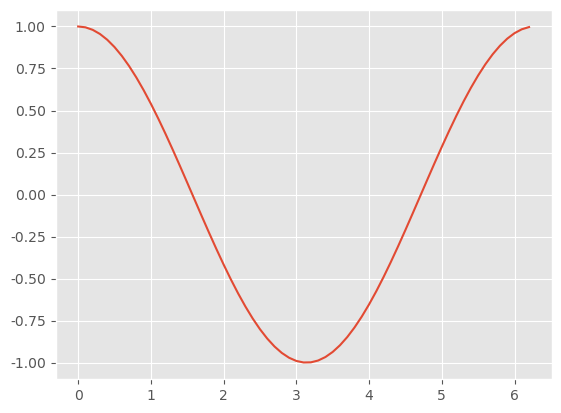

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0, np.pi*2, 0.1)  # start, stop, step
y = np.cos(x)

plt.plot(x,y)
plt.show();

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# 첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
start = len(reviews[0]) // 2 

# 중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
source = reviews[0][-start:]

# 코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
# transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력
source_cv = cv.transform([source])

# 행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)
print("#대상 특성 행렬의 크기:", source_cv.shape)

# 변환된 count vector와 기존 값들과의 similarity 계산
sim_result = cosine_similarity(source_cv, reviews_cv) 

print("#유사도 계산 행렬의 크기:", sim_result.shape)
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


In [32]:
import numpy as np

print("가장 유사한 리뷰의 인덱스 : {}".format(np.argmax(sim_result[0])))

가장 유사한 리뷰의 인덱스 : 0


In [34]:
print("가장 유사한 리뷰부터 정렬한 인덱스 : \n{}".format((-sim_result[0]).argsort()[:10]))

가장 유사한 리뷰부터 정렬한 인덱스 : 
[   0 1110 1570  687  628  112 1712 1393  524 1740]


## 4.6 TF-IDF로 성능을 높여보자

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)

# TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인
print('#shape of tfidf matrix : {}\n'.format(reviews_tfidf.shape))

# 첫 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('#20 count score of the first review : \n{}\n'.format(reviews_cv[0].toarray()[0][:20]))

# 첫 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('#20 count score of the first review : \n{}'.format(reviews_tfidf[0].toarray()[0][:20]))


#shape of tfidf matrix : (2000, 1000)

#20 count score of the first review : 
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]

#20 count score of the first review : 
[0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

source_tf = tf.transform([source])

sim_result_tf = cosine_similarity(source_tf, reviews_tf)

print("#가장 유사한 리뷰의 인덱스 : {}".format(np.argmax(sim_result_tf[0])))

#가장 유사한 리뷰의 인덱스 : 0


In [47]:
print('#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])

#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]
#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
